# Etude des GANs

Ce notebook servira a faire l'analyse de nos données, dans un second temps un notebook sera créée pour avoir l'exécution des modèles.

## Import

In [17]:
import numpy as np
import pandas as pd
import re
import os

import requests
from bs4 import BeautifulSoup

import matplotlib.pylab as plt
import seaborn as sns
import missingno as msno

from PIL import Image
import cv2


## Récupération des données

In [2]:
df = pd.read_csv("src/art_catalog.xlsx - catalog.csv")

In [3]:
df.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650


Sélection des peintures

In [4]:
df.drop(df[df['FORM'] != "painting"].index, inplace = True)
df.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650


## Analyse des données

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32438 entries, 0 to 52855
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   AUTHOR     32438 non-null  object
 1   BORN-DIED  32438 non-null  object
 2   TITLE      32438 non-null  object
 3   DATE       32438 non-null  object
 4   TECHNIQUE  32438 non-null  object
 5   LOCATION   32438 non-null  object
 6   URL        32438 non-null  object
 7   FORM       32438 non-null  object
 8   TYPE       32438 non-null  object
 9   SCHOOL     32438 non-null  object
 10  TIMEFRAME  32438 non-null  object
dtypes: object(11)
memory usage: 3.0+ MB


In [6]:
df.select_dtypes('object').apply(pd.Series.nunique, axis=0)

AUTHOR        3663
BORN-DIED     4141
TITLE        20981
DATE          3444
TECHNIQUE    16546
LOCATION      2284
URL          32438
FORM             1
TYPE            10
SCHOOL          26
TIMEFRAME       29
dtype: int64

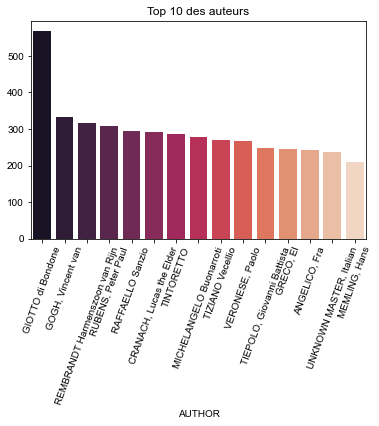

In [7]:
author_counts = df.groupby('AUTHOR')['TITLE'].count()
author_counts = author_counts.sort_values(ascending=False)
top_10_authors = author_counts.head(15)
sns.barplot(x=top_10_authors.index, y=top_10_authors.values, palette='rocket').set_title("Top 10 des auteurs")
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=70);

Nous observons que l'artiste GIOTTO à pratiquement 2 fois plus d'oeuvre dans ce dataset que les autres

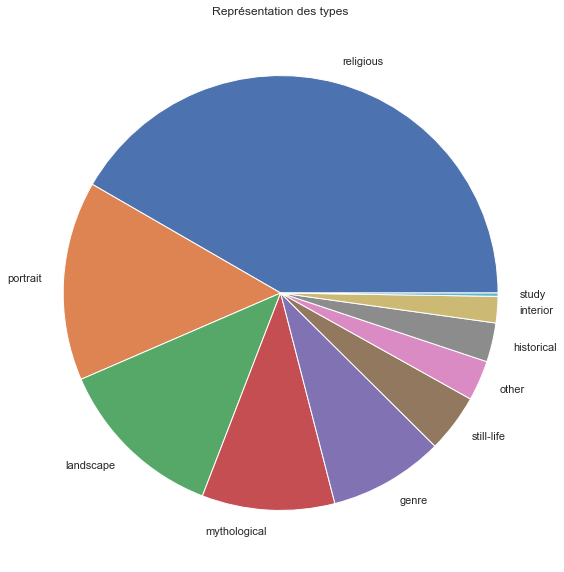

In [8]:
type_counts = df.groupby('TYPE')['TITLE'].count()
type_counts = type_counts.sort_values(ascending=False)
fig = plt.figure(figsize =(15, 10))
plt.title("Représentation des types")
plt.pie(type_counts, labels= type_counts.index);

On peut voir qu'en concordance avec l'époque de la plus part des artistes les peintures sont centrés sur la religion et les portraits

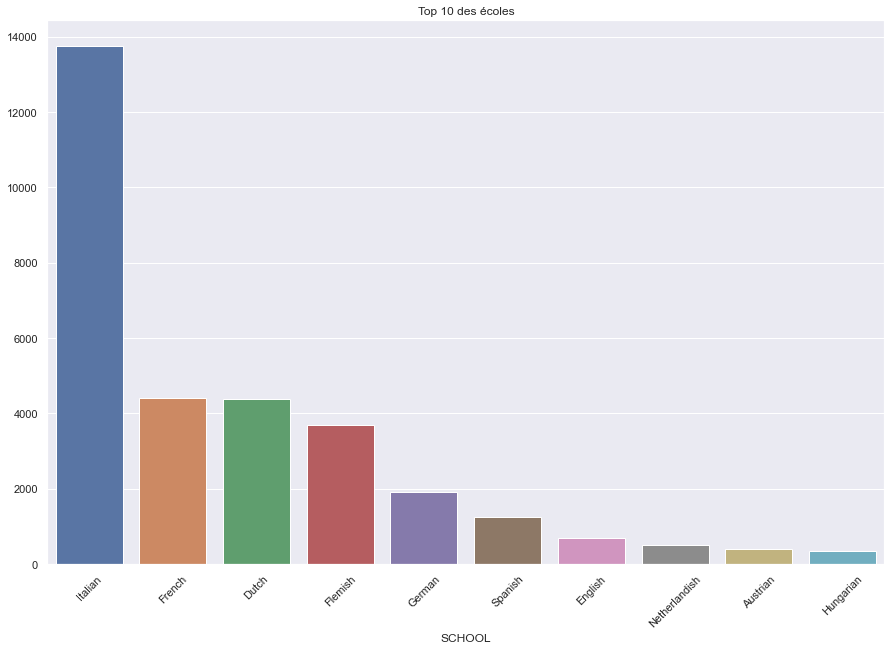

In [9]:
school_counts = df.groupby('SCHOOL')['TITLE'].count()
school_counts = school_counts.sort_values(ascending=False)
top_10_school = school_counts.head(10)
sns.barplot(x=top_10_school.index, y=top_10_school.values).set_title("Top 10 des écoles")
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=45);

On peut voir qu'il y a une grande majorité des oeuvres qui sont d'écoles italienne.

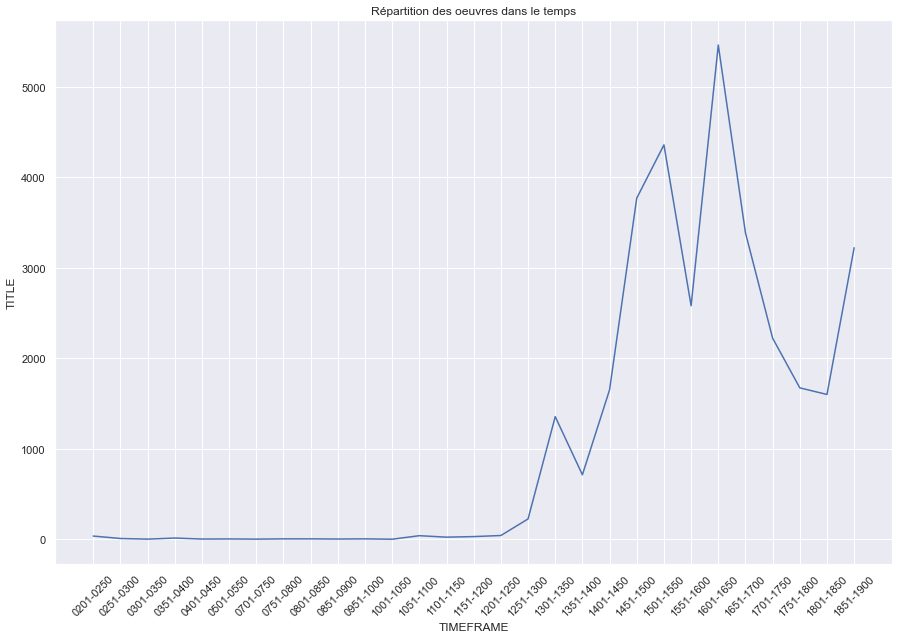

In [10]:
time_counts = df.groupby('TIMEFRAME')['TITLE'].count()
sns.lineplot(y=time_counts, x=time_counts.index).set_title("Répartition des oeuvres dans le temps")
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=45);

On peut voir que l'on a un début des tableaux vers 1200, un premier pic entre 1450 et 1700 puis un deuxieme vers 1800.

In [11]:
# ^\w+ (regex first word) (\d+\sx\s\d+) taille
df['paint-type']=df['TECHNIQUE'].str.extract(r'(^\w+)')
df['taille']=df['TECHNIQUE'].str.extract(r'(\d+\sx\s\d+)')
df.head()

,AUTHOR,BORN-DIED,TITLE,DATE,TECHNIQUE,LOCATION,URL,FORM,TYPE,SCHOOL,TIMEFRAME,paint-type,taille
0,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Venus and Adonis,1574-88,"Oil on canvas, 68 x 95 cm","Fogg Art Museum, Harvard University, Cambridge",https://www.wga.hu/html/a/aachen/adonis.html,painting,mythological,German,1601-1650,Oil,68 x 95
1,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)",Allegory,1598,"Oil on copper, 56 x 47 cm","Alte Pinakothek, Munich",https://www.wga.hu/html/a/aachen/allegory.html,painting,mythological,German,1601-1650,Oil,56 x 47
2,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Allegory of Peace, Art and Abundance",1602,"Oil on canvas, 197 x 142 cm","The Hermitage, St. Petersburg",https://www.wga.hu/html/a/aachen/allegorz.html,painting,mythological,German,1601-1650,Oil,197 x 142
3,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Jupiter, Antiope and Cupid",1595-98,"Oil on copper, 31 x 21 cm","Kunsthistorisches Museum, Vienna",https://www.wga.hu/html/a/aachen/antiope.html,painting,mythological,German,1601-1650,Oil,31 x 21
4,"AACHEN, Hans von","(b. 1552, Köln, d. 1615, Praha)","Pallas Athena, Venus and Juno",1593,"Oil on canvas, 54 x 67 cm","Museum of Fine Arts, Boston",https://www.wga.hu/html/a/aachen/athena.html,painting,mythological,German,1601-1650,Oil,54 x 67


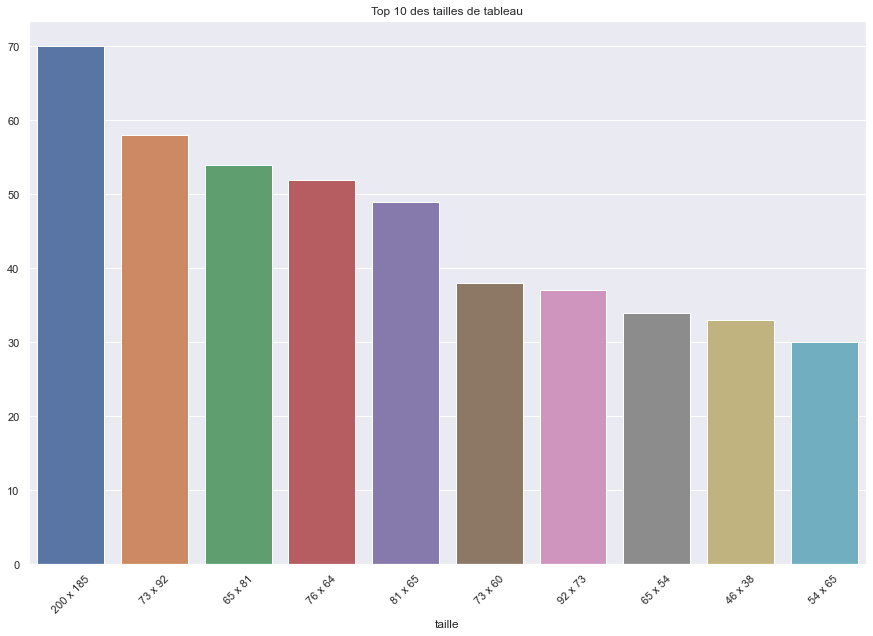

In [12]:
taille_counts = df.groupby('taille')['TITLE'].count()
taille_counts = taille_counts.sort_values(ascending=False)
top_10_taille = taille_counts.head(10)
sns.barplot(x=top_10_taille.index, y=top_10_taille.values).set_title("Top 10 des tailles de tableau")
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=45);

Ce graphique nous aidera pour avoir les différentes résolution de tableau que nous aurons

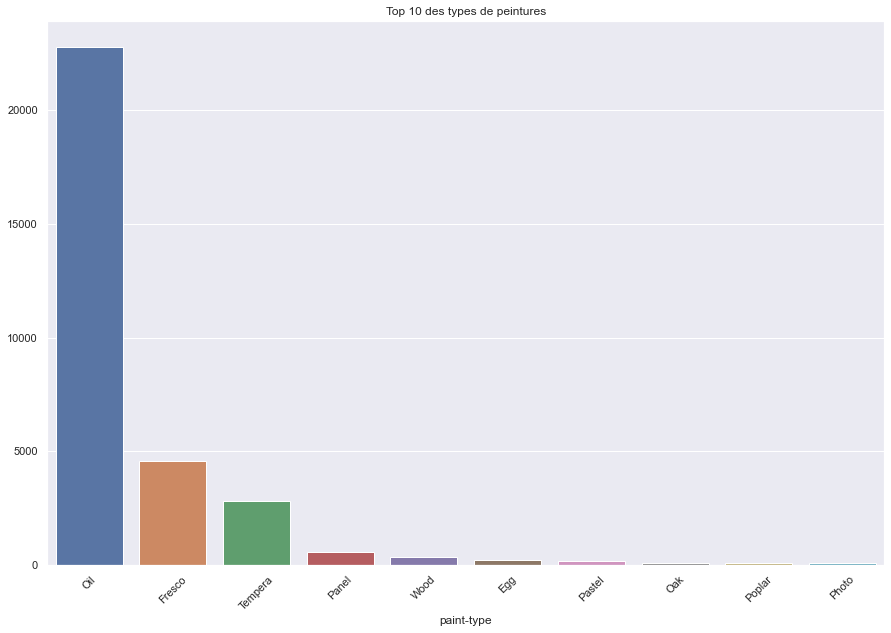

In [13]:
paint_type_counts = df.groupby('paint-type')['TITLE'].count()
paint_type_counts = paint_type_counts.sort_values(ascending=False)
top_10_paint_type = paint_type_counts.head(10)
sns.barplot(x=top_10_paint_type.index, y=top_10_paint_type.values).set_title("Top 10 des types de peintures")
sns.set(rc={'figure.figsize':(15,10)})
plt.xticks(rotation=45);

Nous observons une majorité de tableaux à l'huile dans notre dataset

Avec cette analyse je peux en conclure que nous allons avoir un modèle orienté dans la génération de tableaux à l'huile d'artistes italien du 17ème siècle.

## Récupération des oeuvres

In [14]:
links = df["URL"]
img_links = []
for link in links: 
  link1 = link.replace('.html', '.jpg')
  link2 = link1.replace('html','art')
  img_links.append(link2)

j = 0

"""for img_url in img_links:
  response = requests.get(img_url)
  if response.status_code:
    match = re.search(r'([^\/]+\.\w+)$', img_url)
    img_name = match.group(1)
    fp = open("src/img/"+str(j)+".jpeg" , 'wb')
    fp.write(response.content)
    fp.close()
    j += 1"""

'for img_url in img_links:\n  response = requests.get(img_url)\n  if response.status_code:\n    match = re.search(r\'([^\\/]+\\.\\w+)$\', img_url)\n    img_name = match.group(1)\n    fp = open("src/img/"+str(j)+".jpeg" , \'wb\')\n    fp.write(response.content)\n    fp.close()\n    j += 1'

## Traitement des images

### Resize

In [15]:
folder = 'src/img'
new_size = (400, 400)

"""for filename in os.listdir(folder):
    if filename.endswith('.jpeg'):
        filepath = os.path.join(folder, filename)
        with Image.open(filepath) as im:
            im = im.resize(new_size)
            im.save(filepath)"""

"for filename in os.listdir(folder):\n    if filename.endswith('.jpeg'):\n        filepath = os.path.join(folder, filename)\n        with Image.open(filepath) as im:\n            im = im.resize(new_size)\n            im.save(filepath)"